In [5]:
!pip list

Package                   Version             Editable project location
------------------------- ------------------- -------------------------------------------------
absl-py                   2.2.1
anyio                     4.9.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asdf                      4.1.0
asdf-astropy              0.7.1
asdf_coordinates_schemas  0.3.0
asdf_standard             1.1.1
asdf_transform_schemas    0.5.0
asdf_wcs_schemas          0.4.0
astropy                   7.0.1
astropy-iers-data         0.2025.3.10.0.29.26
astroquery                0.4.10
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.13.3
bleach                    6.2.0
certifi                   2025.1.31
cffi                      1.17.1
charset-normalizer        3.4.1
chronoxtract              0.0.2               /run/media/asci/Data/E/Pr

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import chronoxtract as ct

In [2]:
np.random.seed(0)
# Create a synthetic signal
time = np.linspace(0, 10, 1000)
signal = np.sin(2 * np.pi * 1 * time) + 0.5 * np.random.normal(size=time.shape)

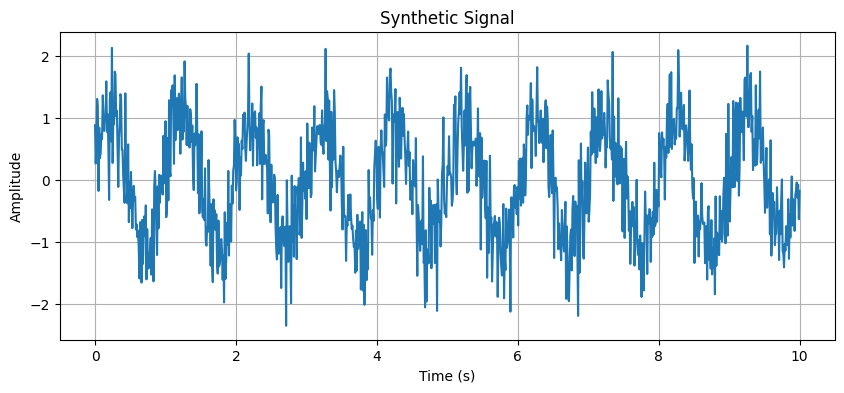

In [3]:
plt.figure(figsize=(10, 4))
plt.plot(time, signal)
plt.title('Synthetic Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [10]:
ct.time_series_summary(signal)

{'mean': -0.022628353745097737,
 'median': -0.045471599714667604,
 'mode': -0.4774757838194159,
 'variance': 0.7778642054045868,
 'standard_deviation': 0.8819661021856717,
 'skewness': -0.005647738145222197,
 'kurtosis': 2.2919593451211093,
 'minimum': -2.358977432916485,
 'maximum': 2.168120561281297,
 'range': 4.527097994197782,
 'q05': -1.399684406890938,
 'q25': -0.6905882830552018,
 'q75': 0.6720919157059284,
 'q95': 1.3792778393167064,
 'sum': -22.628353745097737,
 'absolute_energy': 778.3762477978003}

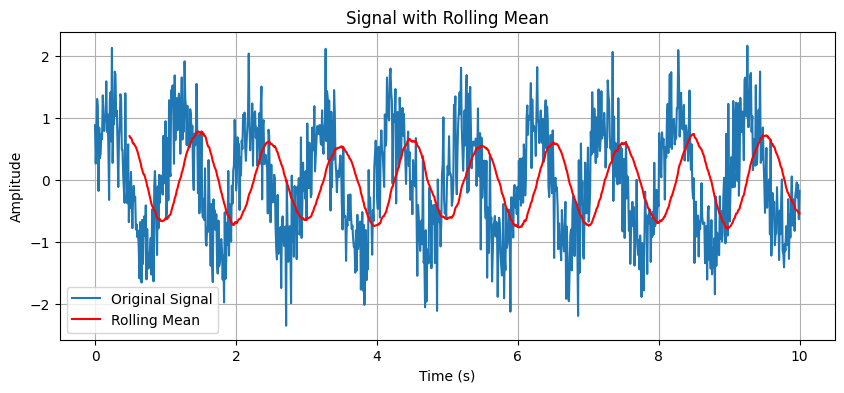

In [17]:
# Plot the signal and the rolling mean
plt.figure(figsize=(10, 4))
plt.plot(time, signal, label='Original Signal')

# Calculate rolling mean
rolling_mean = ct.rolling_mean(signal, window=50)

# Adjust time array to match the rolling mean length
if len(rolling_mean) != len(time):
    # Option 1: Truncate time array to match rolling_mean length
    adjusted_time = time[50-1:]  # Assuming window-1 elements are lost at beginning
    
    # Plot with adjusted time
    plt.plot(adjusted_time, rolling_mean, label='Rolling Mean', color='red')
else:
    # If lengths already match
    plt.plot(time, rolling_mean, label='Rolling Mean', color='red')

plt.title('Signal with Rolling Mean')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

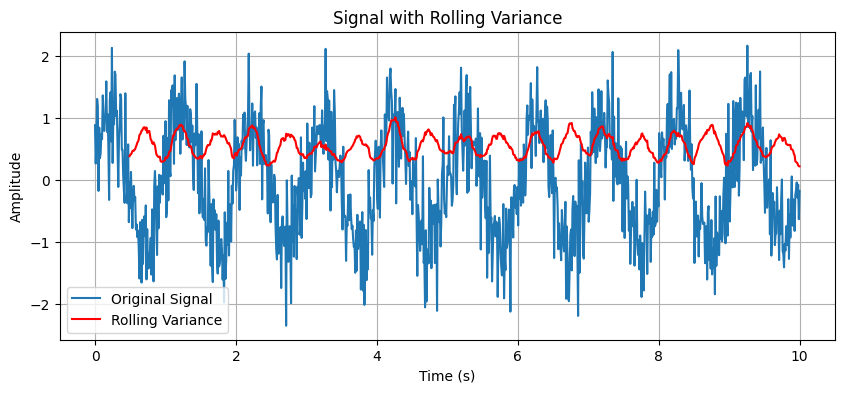

In [18]:
# Plot the signal and the rolling mean
plt.figure(figsize=(10, 4))
plt.plot(time, signal, label='Original Signal')

# Calculate rolling mean
rolling_variance = ct.rolling_variance(signal, window=50)

# Adjust time array to match the rolling mean length
if len(rolling_variance) != len(time):
    # Option 1: Truncate time array to match rolling_mean length
    adjusted_time = time[50-1:]  # Assuming window-1 elements are lost at beginning
    
    # Plot with adjusted time
    plt.plot(adjusted_time, rolling_variance, label='Rolling Variance', color='red')
else:
    # If lengths already match
    plt.plot(time, rolling_variance, label='Rolling Variance', color='red')

plt.title('Signal with Rolling Variance')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

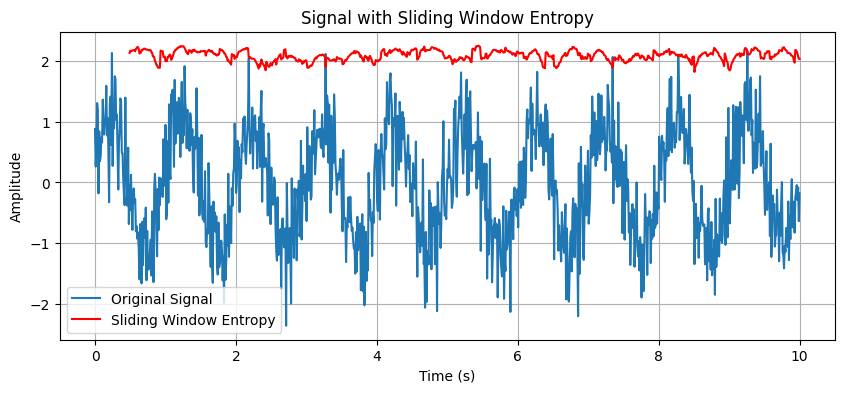

In [21]:
ct.sliding_window_entropy(signal, window=50, bins=10)
# Plot the signal and the sliding window entropy
plt.figure(figsize=(10, 4))
plt.plot(time, signal, label='Original Signal')
# Calculate sliding window entropy
sliding_entropy = ct.sliding_window_entropy(signal, window=50, bins=10)
# Adjust time array to match the sliding window entropy length
if len(sliding_entropy) != len(time):
    # Option 1: Truncate time array to match sliding_entropy length
    adjusted_time = time[50-1:]  # Assuming window-1 elements are lost at beginning
    
    # Plot with adjusted time
    plt.plot(adjusted_time, sliding_entropy, label='Sliding Window Entropy', color='red')
else:
    # If lengths already match
    plt.plot(time, sliding_entropy, label='Sliding Window Entropy', color='red')
plt.title('Signal with Sliding Window Entropy')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

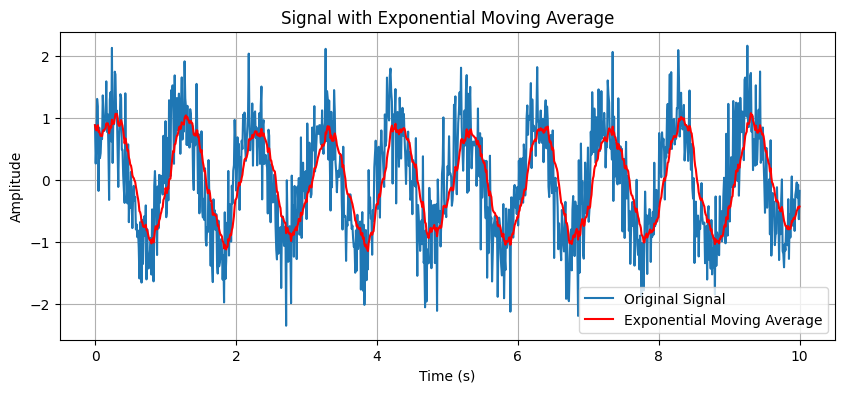

In [22]:
# Plot the signal and the exponential moving average
plt.figure(figsize=(10, 4))
plt.plot(time, signal, label='Original Signal')
# Calculate exponential moving average
exponential_moving_average = ct.exponential_moving_average(signal, alpha=0.1)
# Adjust time array to match the exponential moving average length
if len(exponential_moving_average) != len(time):
    # Option 1: Truncate time array to match exponential_moving_average length
    adjusted_time = time[50-1:]  # Assuming window-1 elements are lost at beginning
    
    # Plot with adjusted time
    plt.plot(adjusted_time, exponential_moving_average, label='Exponential Moving Average', color='red')
else:
    # If lengths already match
    plt.plot(time, exponential_moving_average, label='Exponential Moving Average', color='red')
plt.title('Signal with Exponential Moving Average')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

Peak frequency (Lomb-Scargle): 1.0 Hz


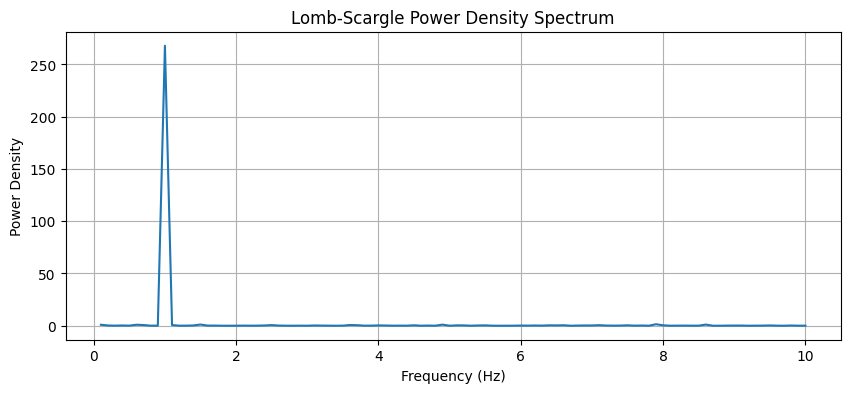

In [26]:
# Finding frequency using FFT and Lomb-Scargle from chronoxtract
# Lomb-Scargle

ls_pds = ct.lomb_scargle_py(time, signal, freqs=np.linspace(0.1, 10, 100))
# Highest peak frequency
peak_freq = np.argmax(ls_pds)
print(f"Peak frequency (Lomb-Scargle): {np.linspace(0.1, 10, 100)[peak_freq]} Hz")

plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0.1, 10, 100), ls_pds)
plt.title('Lomb-Scargle Power Density Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Density')
plt.grid()
plt.show()

Peak frequency (FFT): 0.999 Hz


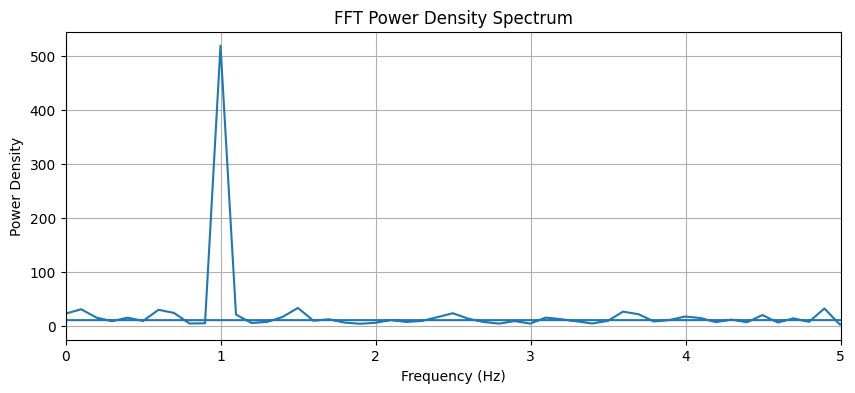

In [6]:
fft_pds = ct.perform_fft_py(signal)
# Taking absolute value of FFT result
fft_pds = np.abs(fft_pds)
# Highest peak frequency
peak_freq = np.argmax(fft_pds)
print(f"Peak frequency (FFT): {np.fft.fftfreq(len(signal), d=(time[1]-time[0]))[peak_freq]} Hz")
plt.figure(figsize=(10, 4))
plt.plot(np.fft.fftfreq(len(signal), d=(time[1]-time[0])), fft_pds)
plt.title('FFT Power Density Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Density')
plt.xlim(0, 5)  # Limit x-axis to positive frequencies
plt.grid()
plt.show()

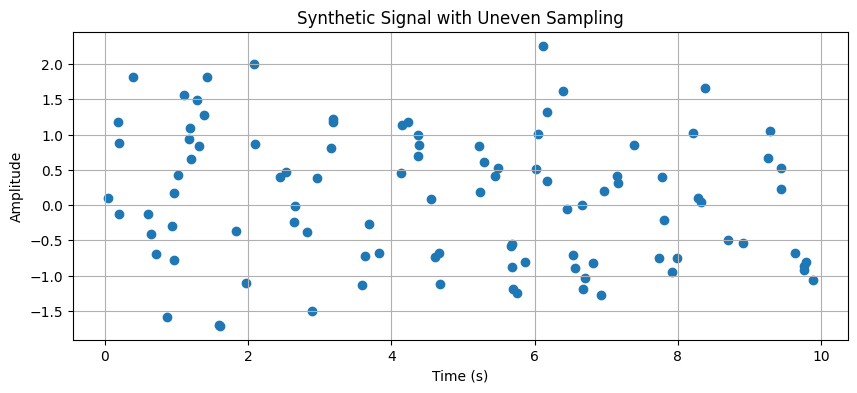

Peak frequency (Lomb-Scargle): 1.0 Hz


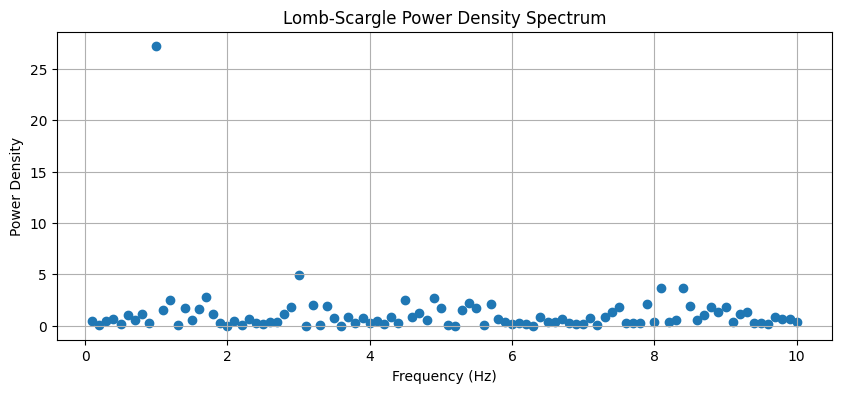

Peak frequency (FFT): -0.56760436765988 Hz


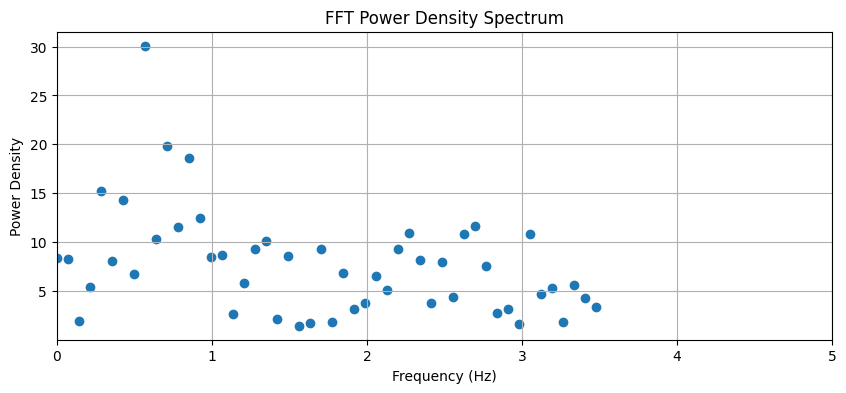

In [8]:
# generate a synthetic signal with two frequencies and uneven sampling
np.random.seed(0)
time = np.sort(np.random.rand(100) * 10)  # unevenly spaced time points
signal = np.sin(2 * np.pi * 1 * time) + 0.5 * np.sin(2 * np.pi * 3 * time) + 0.5 * np.random.normal(size=time.shape)
plt.figure(figsize=(10, 4))
plt.scatter(time, signal)
plt.title('Synthetic Signal with Uneven Sampling')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()
# Lomb-Scargle
ls_pds = ct.lomb_scargle_py(time, signal, freqs=np.linspace(0.1, 10, 100))
# Highest peak frequency
peak_freq = np.argmax(ls_pds)
print(f"Peak frequency (Lomb-Scargle): {np.linspace(0.1, 10, 100)[peak_freq]} Hz")
plt.figure(figsize=(10, 4))
plt.scatter(np.linspace(0.1, 10, 100), ls_pds)
plt.title('Lomb-Scargle Power Density Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Density')
plt.grid()
plt.show()
# FFT
# Perform FFT on unevenly sampled data
fft_pds = ct.perform_fft_py(signal)
# Taking absolute value of FFT result
fft_pds = np.abs(fft_pds)
# Highest peak frequency
peak_freq = np.argmax(fft_pds)
print(f"Peak frequency (FFT): {np.fft.fftfreq(len(signal), d=(time[1]-time[0]))[peak_freq]} Hz")
plt.figure(figsize=(10, 4))
plt.scatter(np.fft.fftfreq(len(signal), d=(time[1]-time[0])), fft_pds)
plt.title('FFT Power Density Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Density')
plt.xlim(0, 5)  # Limit x-axis to positive frequencies
plt.grid()
plt.show()